In [11]:
%matplotlib inline

import numpy as np
np.random.seed(1337)  # for reproducibility

from sklearn import datasets
from sklearn import cross_validation
from sklearn import preprocessing


In [12]:
import pandas as pd

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.noise import GaussianNoise
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.utils import np_utils

In [14]:
columns = [
    'state',
    'account length', 
    'area code', 
    'phone number', 
    'international plan', 
    'voice mail plan', 
    'number vmail messages',
    'total day minutes',
    'total day calls',
    'total day charge',
    'total eve minutes',
    'total eve calls',
    'total eve charge',
    'total night minutes',
    'total night calls',
    'total night charge',
    'total intl minutes',
    'total intl calls',
    'total intl charge',
    'number customer service calls',
    'churn']

df = pd.read_csv('churn.data.txt', header=None, names=columns)
mapping = {'no': 0., 'yes':1., 'False.':0., 'True.':1.}
df.replace({'international plan' : mapping, 'voice mail plan' : mapping, 'churn':mapping}, regex=True, inplace=True)

df.drop('phone number', axis=1, inplace=True)
df.drop('area code', axis=1, inplace=True)
df.drop('state', axis=1, inplace=True)

print("Dataset shape" + str(df.shape))


Dataset shape(3333, 18)


In [15]:
d_1 = df[df['churn']==1]
d_2 = df[df['churn']==0]

df = d_1.append(d_2[:400])

In [16]:
# split train - test 90% 10%
X = df.ix[:, df.columns != 'churn']
Y = df['churn']

X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X, Y, test_size=0.1, random_state=0)

In [17]:
#churn or not churn
nb_classes = 1 

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#scale the inputs for NN
scaler = preprocessing.MinMaxScaler((-1,1))
scaler.fit(X)

XX_train = scaler.transform(X_train.values)
XX_test  = scaler.transform(X_test.values)

YY_train = Y_train.values 
YY_test  = Y_test.values 

In [18]:
print (X_train.shape, YY_train.shape)
print (X_test.shape, YY_test.shape)

(794, 17) (794,)
(89, 17) (89,)


In [19]:
# 100 epochs, gradient batched each 100 samples

batch_size = 100
nb_epoch = 100

In [20]:
model = Sequential()

model.add(Dense(50, input_shape=(17,)))
model.add(Activation("hard_sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(10))
model.add(Activation("hard_sigmoid"))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

model.fit(XX_train, YY_train, batch_size=batch_size, nb_epoch=nb_epoch,
          show_accuracy=True, verbose=1, validation_data=(XX_test, YY_test))

score = model.evaluate(XX_test, YY_test, show_accuracy=True, verbose=0)

print('Test score:', score[0])
print('Test accuracy:', score[1])

Train on 794 samples, validate on 89 samples
Epoch 1/100
794/794 [==============================] - 0s - loss: 0.7502 - acc: 0.5680 - val_loss: 0.7123 - val_acc: 0.4831
Epoch 2/100
794/794 [==============================] - 0s - loss: 0.6630 - acc: 0.6373 - val_loss: 0.6926 - val_acc: 0.4719
Epoch 3/100
794/794 [==============================] - 0s - loss: 0.6398 - acc: 0.6436 - val_loss: 0.6576 - val_acc: 0.6067
Epoch 4/100
794/794 [==============================] - 0s - loss: 0.5967 - acc: 0.6688 - val_loss: 0.6239 - val_acc: 0.7079
Epoch 5/100
794/794 [==============================] - 0s - loss: 0.5865 - acc: 0.7015 - val_loss: 0.6018 - val_acc: 0.7528
Epoch 6/100
794/794 [==============================] - 0s - loss: 0.5813 - acc: 0.7065 - val_loss: 0.5939 - val_acc: 0.7303
Epoch 7/100
794/794 [==============================] - 0s - loss: 0.5620 - acc: 0.7141 - val_loss: 0.5963 - val_acc: 0.7191
Epoch 8/100
794/794 [==============================] - 0s - loss: 0.5661 - acc: 0.7267 

In [21]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, learning_rate=300, n_iter=50000, n_iter_without_progress=1000, random_state=0)
d = model.fit_transform(XX_train, Y_train) 



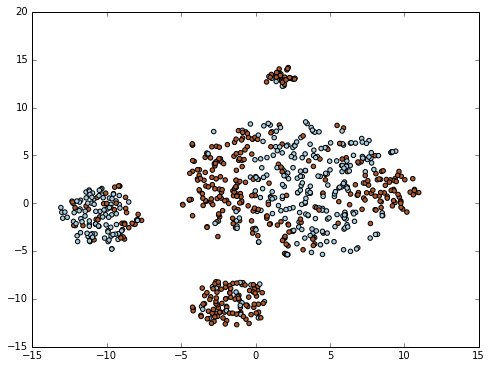

In [22]:
import matplotlib.pyplot as plt
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(d[:, 0], d[:, 1], c=Y_train, cmap=plt.cm.Paired)
plt.show()

In [24]:
#compare with decision trees
from sklearn import tree

In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)

In [26]:
from sklearn import metrics
metrics.accuracy_score(Y_test, Y_pred)

0.8202247191011236